In [1]:
%matplotlib notebook

from blackjack import BlackJack

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "data/LearningRate/MonteCarloControl"
a1, a2, a3 = np.load(path + "WithExploringStartsLR.npy"), np.load(path + "WithoutExploringStartLR.npy"), np.load(path + "OffPolicyLR.npy")

In [3]:
profits = [np.array(list(map(lambda x: x.dot([-2,-1,0,1,2]), a))) for a in [a1, a2, a3]]
rates = [np.array(list(map(lambda x: (x[0] + x[1] - x[3] - x[4]) / sum(x), a))) for a in [a1, a2, a3]]

In [4]:
def poly(ys, d):
    xs = np.arange(len(ys))
    poly = np.polyfit(xs, ys, d)
    exps = np.flip(np.arange(d+1))
    return list(map(lambda x: sum([coef * x ** exp for (coef, exp) in zip(poly, exps)]), xs))

In [5]:
def test_random_policy(epochs = 500_000):
    game = BlackJack()
    actions = ["hit", "stand", "double"]
    rewards = [0] * epochs
    
    for i in range(epochs):
    
        game.start()

        while game.player_hand_sum < 21: # while the player hasn't busted

            action = random.choice(actions)

            if action == "hit":
                game.hit()
            elif action == "stand":
                game.stand() # if we stand, the round ends
                break
            else:
                game.double() # if we double, the round ends because double = hit -> stand
                break

        # store reward
        rewards[i] = game.get_reward()
    return rewards

In [6]:
rewards = np.unique(test_random_policy(), return_counts = True)[1]
rewards

New BlackJack game created


array([132291, 199580,  23215,  99817,  45097], dtype=int64)

In [7]:
random_policy_profit = rewards.dot([-2,-1,0,1,2])
random_policy_rate = (rewards[0] + rewards[1] - rewards[3] - rewards[4]) / sum(rewards)
random_policy_profit, random_policy_rate

(-274151, 0.373914)

<IPython.core.display.Javascript object>


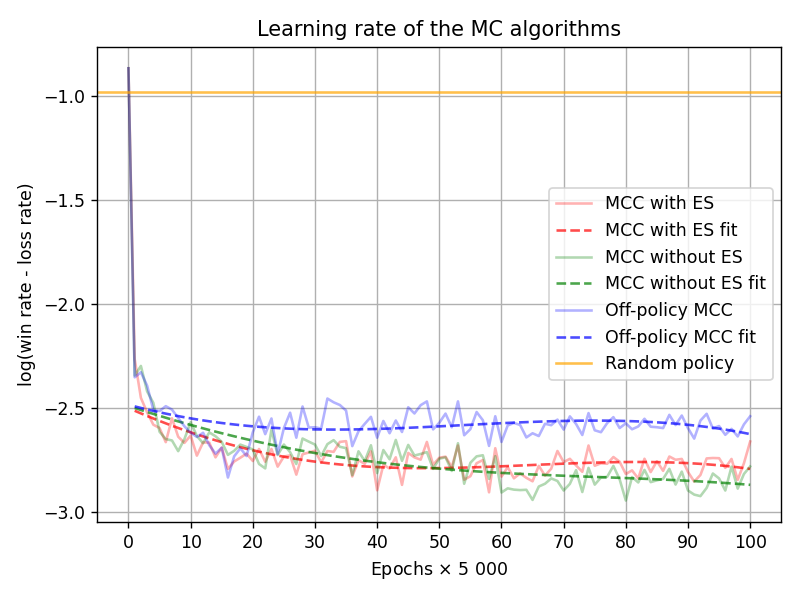

In [11]:
plt.plot(np.log(rates[0]), c = "r", label = "MCC with ES", alpha = .3)
plt.plot(np.arange(1, len(rates[0])), np.log(poly(rates[0][1:], 3)), c = "r", label = "MCC with ES fit", ls = "--", alpha = .7)

plt.plot(np.log(rates[1]), c = "g", label = "MCC without ES", alpha = .3)
plt.plot(np.arange(1, len(rates[1])), np.log(poly(rates[1][1:], 3)), c = "g", label = "MCC without ES fit", ls = "--", alpha = .7)

plt.plot(np.log(rates[2]), c = "b", label = "Off-policy MCC", alpha = .3)
plt.plot(np.arange(1, len(rates[2])), np.log(poly(rates[2][1:], 3)), c = "b", label = "Off-policy MCC fit", ls = "--", alpha = .7)

plt.axhline(np.log(random_policy_rate), label = "Random policy", c = "orange", alpha = .7)

plt.title("Learning rate of the MC algorithms")
plt.ylabel("log(win rate - loss rate)")
plt.xlabel(r"Epochs $\times$ 5 000")
plt.xticks(np.arange(0,101,10))

plt.legend()
plt.tight_layout()

plt.grid()

plt.savefig("LearningRates.pdf")

plt.show()